<a href="https://colab.research.google.com/github/smallnoah711/IS_4487_Tokyo/blob/main/Project_Modeling_with_Classification_Trees_(II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
ad = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Assignments/DataSets/adviseinvest.csv")


In [3]:
ad_clean = ad[(ad['income'] > 0) & (ad['num_accts'] < 100)]
ad_clean.describe()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000,29499.000000,29501.000000,29501.000000,29501.000000,29501.000000,29501.000000
mean,0.546626,33772.036880,0.054168,34.769601,1.915427,1.141012,0.210434,0.681096,0.240788,1.468459,0.956476,2.344870,0.091116,1.535745
std,0.497830,29373.597165,0.226352,11.355150,0.658194,0.348040,0.407623,0.466060,0.427569,1.234722,1.483926,1.200357,0.287778,1.625908
min,0.000000,2760.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000


In [4]:

ad_clean['answered'] = ad_clean['answered'].replace(1, 'yes')
ad_clean['answered'] = ad_clean['answered'].replace(0, 'no')
ad_clean['answered'] = ad_clean['answered'].astype('category')

<ipython-input-4-7ccedd6daed7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_clean['answered'] = ad_clean['answered'].replace(1, 'yes')
<ipython-input-4-7ccedd6daed7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_clean['answered'] = ad_clean['answered'].replace(0, 'no')
<ipython-input-4-7ccedd6daed7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [5]:
ad_clean = ad.dropna()


In [6]:
train = ad_clean.sample(frac=0.8, random_state=200) # 80% of data for training
test = ad_clean.drop(train.index)

In [7]:

X_train = train.drop(['product', 'answered'], axis = 1)
y_train = train['answered']

X_test = test.drop(['product', 'answered'], axis = 1)
y_test = test['answered']

In [8]:

tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
# Fit the model
tree_model = tree_model.fit(X = X_train, y = y_train)

[Text(0.4583333333333333, 0.875, 'chk_acct <= 2.5\nentropy = 0.994\nsamples = 23602\nvalue = [10702, 12900]\nclass = No'),
 Text(0.25, 0.625, 'income <= 108415.0\nentropy = 0.979\nsamples = 15335\nvalue = [8977, 6358]\nclass = Yes'),
 Text(0.16666666666666666, 0.375, 'sav_acct <= 1.5\nentropy = 0.988\nsamples = 14620\nvalue = [8262, 6358]\nclass = Yes'),
 Text(0.08333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.25, 0.125, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 715\nvalue = [715, 0]\nclass = Yes'),
 Text(0.6666666666666666, 0.625, 'income <= 38910.0\nentropy = 0.739\nsamples = 8267\nvalue = [1725, 6542]\nclass = No'),
 Text(0.5, 0.375, 'age <= 22.5\nentropy = 0.538\nsamples = 6470\nvalue = [796, 5674]\nclass = No'),
 Text(0.4166666666666667, 0.125, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.125, '\n  (...)  \n'),
 Text(0.8333333333333334, 0.375, 'num_accts <= 1.5\nentropy = 0.999\nsamples = 1797\nvalue = [929, 868]\nclass = Yes'),
 Text(0.75, 0

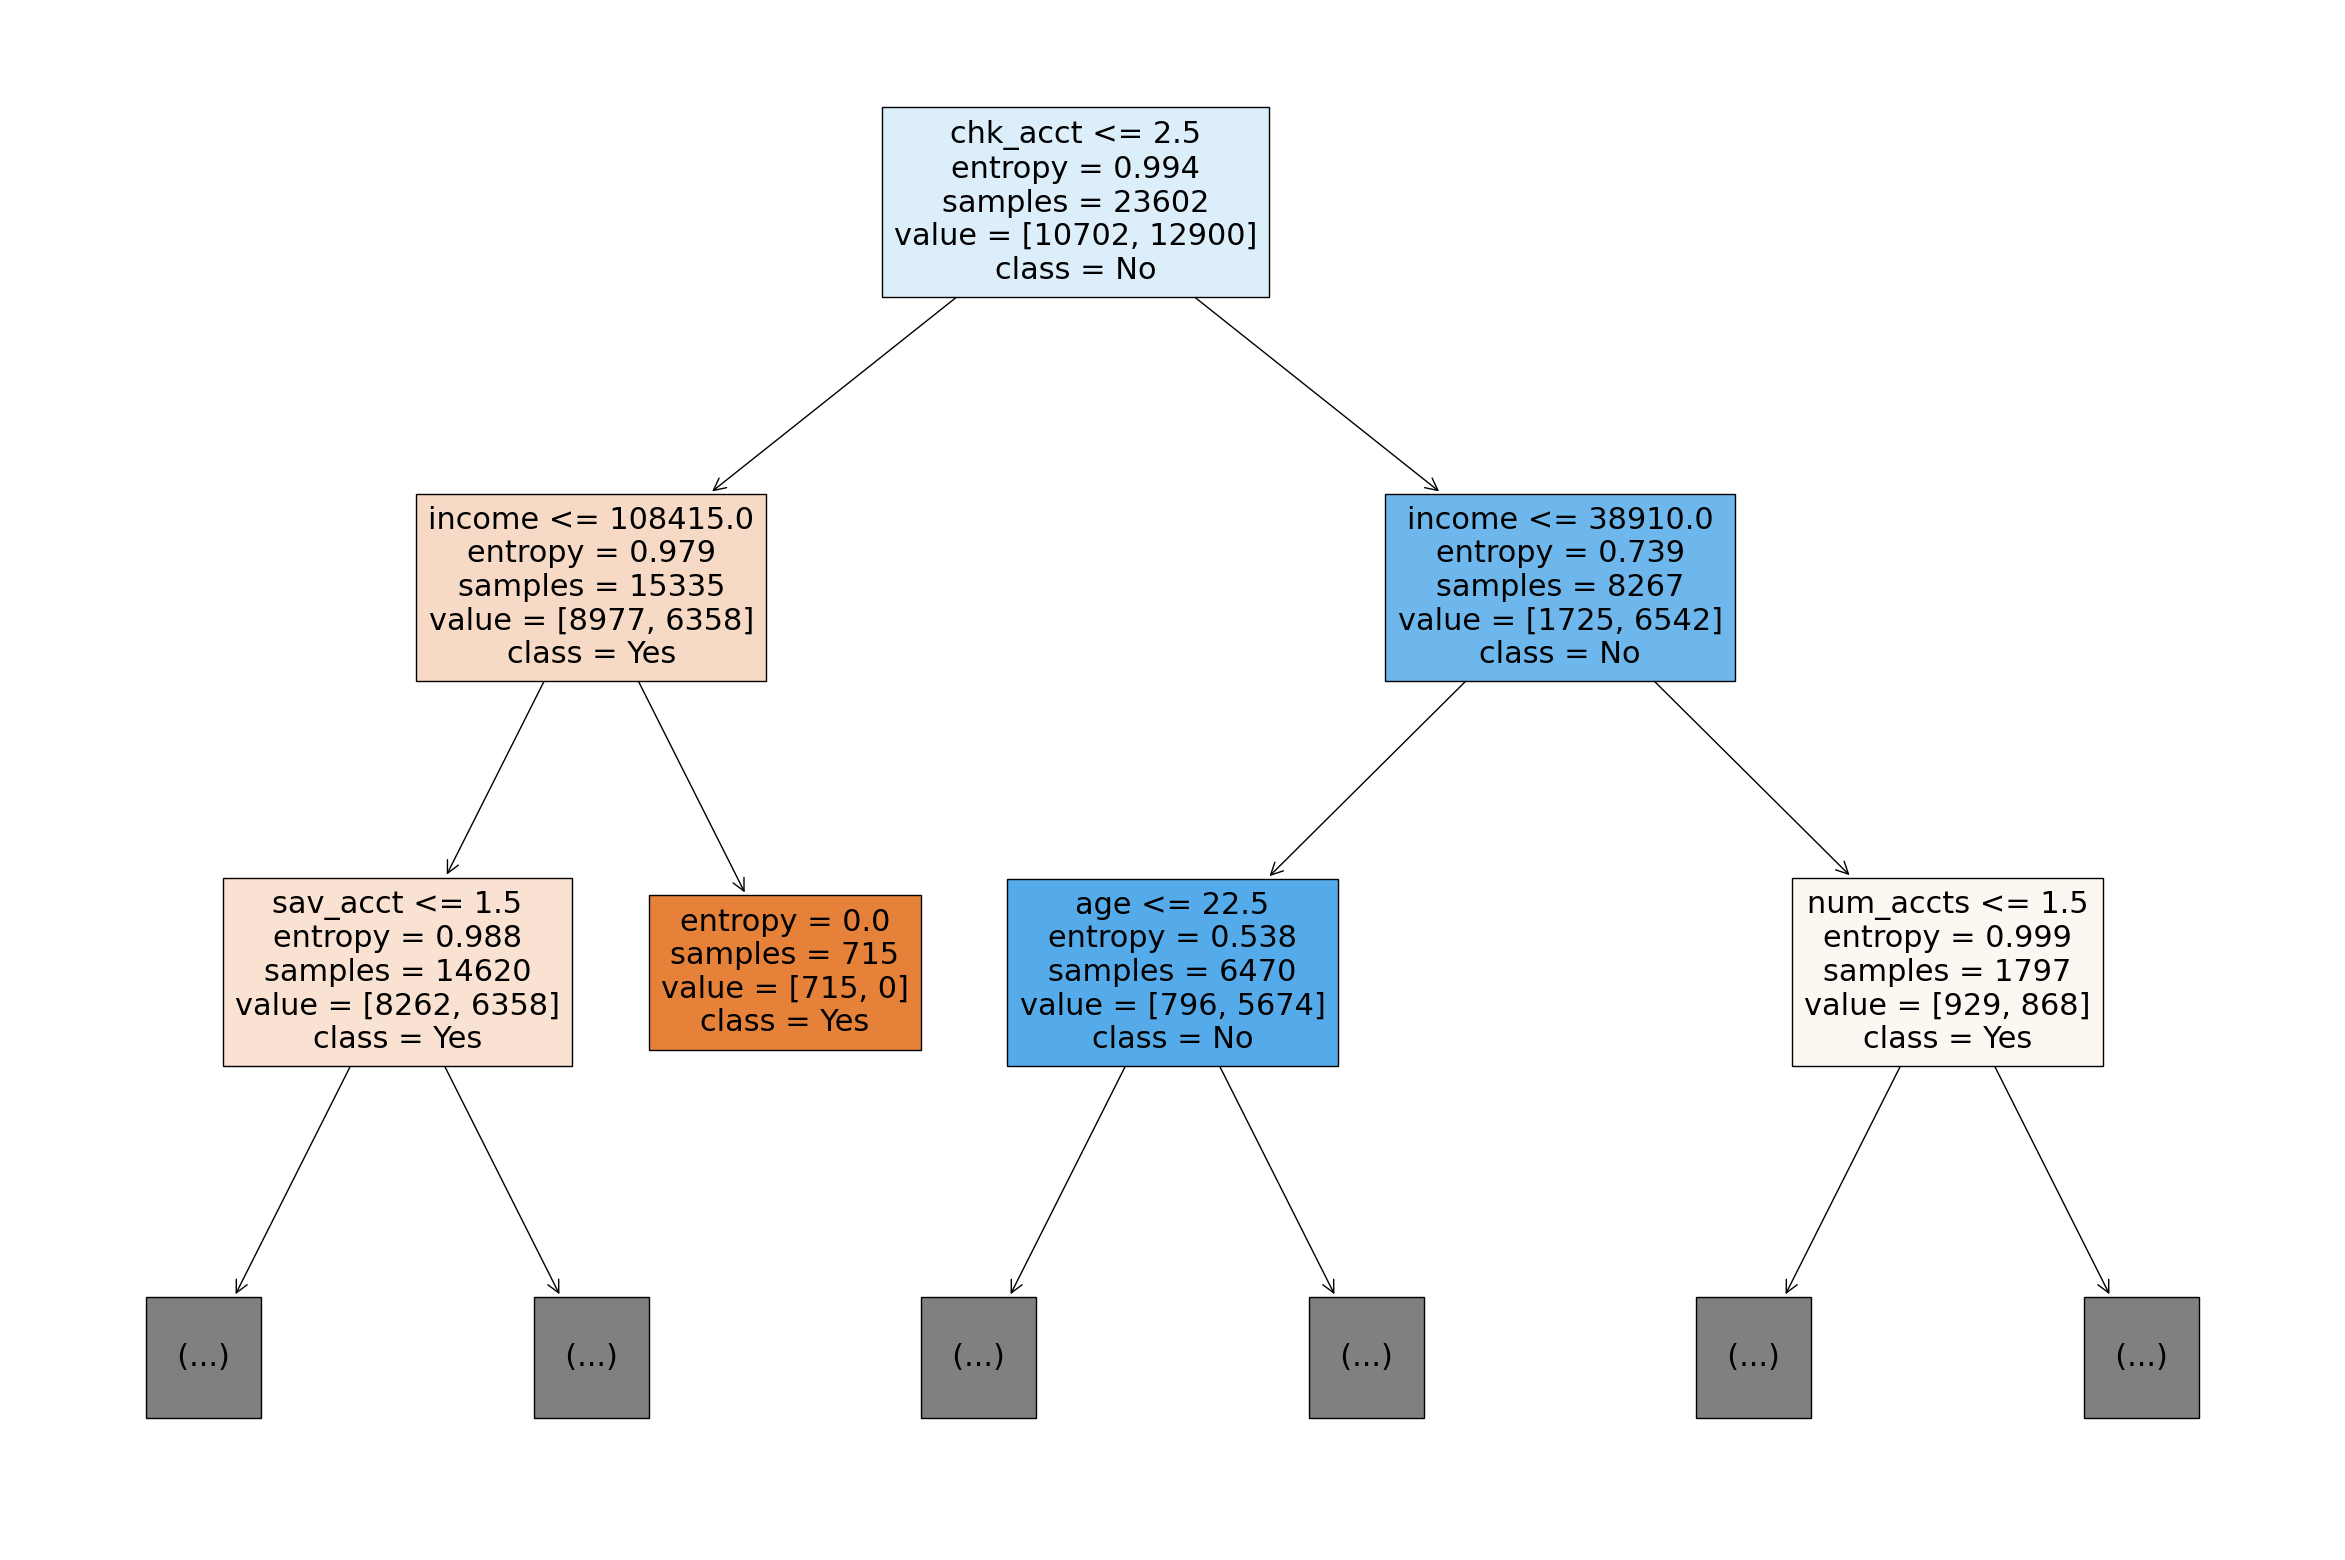

In [9]:

plt.figure(figsize=(30,20))
plot_tree(tree_model,
          feature_names = X_train.columns,
          class_names=['Yes', 'No'],
          filled=True,
          max_depth=2) # reduce depth for legibility

In [10]:
pred_train = tree_model.predict(X_train)
pred_test = tree_model.predict(X_test)


In [11]:

sum(pred_train == y_train) / len(y_train)

0.7656130836369799

In [12]:

sum(pred_test == y_test) / len(y_test)


0.7550847457627119